<a href="https://colab.research.google.com/github/ashishpatel0720/ml/blob/code/dabble6_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from scipy import sparse

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D, GRU
from keras.layers import Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

import os
import pandas as pd
import numpy as np
import sklearn 
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, chi2

base_path="./dabble6/"
data_path=base_path+"data/"
print(os.listdir(data_path))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', -1)

df_train=pd.read_csv(data_path+"train_data.csv")
df_test=pd.read_csv(data_path+"test_data.csv")

df_train = df_train.fillna("")
df_test=df_test.fillna("") # can't drop from test_data as it will leave empty values in submit

df=pd.concat([df_train,df_test], axis =0).reset_index(drop=True)


vectType='TFIDF'
df.head(2)


%matplotlib inline

['processed', 'sample_submission.csv', 'test_data.csv', 'train_data.csv']


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [19]:
print(np.__version__,pd.__version__)

1.18.5 0.23.4


In [20]:
print(keras.__version__,tensorflow.__version__)

2.3.1 1.14.0


In [16]:
df.drop(['reviewer_id'],axis = 1, inplace=True)
df.head()

,key,label,product_id,review_summary,review_text
0,0,5.0,2f3f32df46c949fd84a8a4a0c1b902c2,Five Stars,Good fun.
1,1,3.0,b6c7faacaada4de3a007d1bca3e7efe3,Close but no cigar,"This is a a great kit and has most of what you need. However the platic in my inside came warped, and the handle lock in so firmly you have to yank them to get them out."
2,2,5.0,68ddd444a0954bb6888e599896fc8f5a,beautiful realistic graphic,"i've purchased several of these beaded bookmarks with different images. This is a realistic horse, which is important to me. Price is right. Comes in a protective plastic sleeve to keep it from bending in shipment. Will buy more as stocking stuffers."
3,3,3.0,c19cf51ef3094c9d834fcf9493a0ef08,Three Stars,ok
4,4,1.0,f408b57d15dc4364873617931679de3a,"The newer model 1260 gloves are no match to older model 1260, very, very poor quality","I purchased my first pair of Harbinger 1260 gloves in 2009 (they had a very high rating which is still carrying over for the bad reviews to have an impact so beware) and used them 2-3 times a week now for 6 years. These were very heavy duty gloves. Out of the box I was very pleased with the quality, they were well made. With the usage I had no problems and they showed very little wear. I recently lost one of the gloves and re-ordered the same model number and size. I was very surprised when the new gloves came and I compared them to my remaining glove. This newer glove is about an inch smaller in length, and in size...about a half a size smaller,much thinner padding, poor stitching and lacked the reinforcements of the earlier glove, it was more of a poorly made bicycle glove. The fingers were much shorter. On the first set of dumbbell curls (about 4 hours after receiving them) the side of the glove split along the leather(?) and fabric seam for about 11/4 inches. I have returned them to amazon. I am now desperately looking for the lost glove. Harbinger needs to change the model number and reduce the price on these to less than $10."


In [17]:
df['review']=df.review_summary+' '+df.review_text # TODO: we can also include productID
# df.drop(['review_summary', 'review_text'], axis=1,inplace=True)
pd.DataFrame(df["review"]).tail()

,review
49994,"Have to work with awhile Although I have an older version of this B&D work bench, I do have to say at this point that I like the way the bench part is on the older version verses this one. Kind of on the light side.....in my opinion. I do like the feature to where you can flip the bench up on one side in order to hold a larger product. I'll just have to see how it works out over time. Just seems to me it's not set up as well, (as far as heavy duty) as the older one is."
49995,"HUGE Storage Case but Here's Why... Other reviewers accurately reflect my favorable opinion of this random orbit sander but I did get a surprise when the item arrived: the storage case is HUGE! When purchasing the kit version of this sander you get the vacuum hose and, yep, a storage case designed to hold the sander and all of the dust collection components--including the hose. It is a monster-sized box.\n\n""Buy"" the way, Amazon would NOT match woodworker.com's lower price on the PC 97355. The problem I had when I called to get the price match was that the person with Amazon's Tool Crib department pretended to be a klutz with web surfing and was unable to even locate the 97355 on woodworker.com's website (I finally had to give her the URL) and then she pretended to be unable to figure out that woodworker.com would provide free shipping if you had come to their site using the URL provided thru toolseeker.com (as I had). Bottom line: Amazon wouldn't price match. Result: I bought from woodworker.com who not only saved me significant bucks but also shipped the product the very same day! My recent experiences (read that more than one) with Amazon's ""SuperSaver"" shipping (their version of free shipping) have been a 5 - 7 day DELAY on shipping of products listed as ""Usually Ships within 24 hours"". When I questioned Amazon about this they defended this practice as their way to save money. My advice: Go to woodworker.com and save yourself even more money and get your stuff shipped the same day instead of one week later."
49996,"Common to Turn White - Don't Buy It. You'll be Disappointed. I spent 4 weeks and $1500 materials installing beautiful travertine stone tile. Spent $25 on Polyblend grout. Followed ALL instructions on their website, on the bag and on Youtube videos, but it still turned white when it dried. Used exact water amount specified by the manufacturer. I used an accurate scale to get the 1/6 ratio correct. Wrung sponges out nearly dry. The white is callled efflorescence. You can tell you have it if you wet the dry grout and it turns the intended color. A tile setter told me this is common with Polyblend and recommended I use brands that are sold at tile stores, not in big orange box store. From tile forums, I see that others have same problem with PolyBlend. I've tried full strength strong chemical recommended for efflorescence on travertine (Skavenja, it's a base rather than an acid because travertine is susceptible to acid). It turned grayish off-white but not the Butter Cream color intended. I would have gladly paid 4x higher to avoid this problem. I hope this review can save you from the trouble I had with PolyBlend. Don't use it until PolyBlend figures out what chemistry problem causes their product to be so much more susceptible to efflorescence. When they do figure it out, hopefully they'll say new and improved to prevent efflorescence."
49997,Cannot Figure it Out Have no idea how to play this game - the directions don't make sense to us.
49998,"Great bulbs, great price Great bulbs, great price, for replacing those costly light bulbs that like to burn out all the time, Have had them working a few months and good so far"


In [18]:
# Replace punctuation,numbers etc. ( may be important ) TODO: can we check without these
df["review"] = df["review"].replace('[^a-zA-Z]+', ' ', regex=True)
df["review"] = df["review"].replace(r"\b[a-zA-Z0-9]\b", '', regex=True) # remove single letter words

pd.DataFrame(df["review"]).tail()

,review
49994,Have to work with awhile Although have an older version of this work bench do have to say at this point that like the way the bench part is on the older version verses this one Kind of on the light side in my opinion do like the feature to where you can flip the bench up on one side in order to hold larger product ll just have to see how it works out over time Just seems to me it not set up as well as far as heavy duty as the older one is
49995,HUGE Storage Case but Here Why Other reviewers accurately reflect my favorable opinion of this random orbit sander but did get surprise when the item arrived the storage case is HUGE When purchasing the kit version of this sander you get the vacuum hose and yep storage case designed to hold the sander and all of the dust collection components including the hose It is monster sized box Buy the way Amazon would NOT match woodworker com lower price on the PC The problem had when called to get the price match was that the person with Amazon Tool Crib department pretended to be klutz with web surfing and was unable to even locate the on woodworker com website finally had to give her the URL and then she pretended to be unable to figure out that woodworker com would provide free shipping if you had come to their site using the URL provided thru toolseeker com as had Bottom line Amazon wouldn price match Result bought from woodworker com who not only saved me significant bucks but also shipped the product the very same day My recent experiences read that more than one with Amazon SuperSaver shipping their version of free shipping have been day DELAY on shipping of products listed as Usually Ships within hours When questioned Amazon about this they defended this practice as their way to save money My advice Go to woodworker com and save yourself even more money and get your stuff shipped the same day instead of one week later
49996,Common to Turn White Don Buy It You ll be Disappointed spent weeks and materials installing beautiful travertine stone tile Spent on Polyblend grout Followed ALL instructions on their website on the bag and on Youtube videos but it still turned white when it dried Used exact water amount specified by the manufacturer used an accurate scale to get the ratio correct Wrung sponges out nearly dry The white is callled efflorescence You can tell you have it if you wet the dry grout and it turns the intended color tile setter told me this is common with Polyblend and recommended use brands that are sold at tile stores not in big orange box store From tile forums see that others have same problem with PolyBlend ve tried full strength strong chemical recommended for efflorescence on travertine Skavenja it base rather than an acid because travertine is susceptible to acid It turned grayish off white but not the Butter Cream color intended would have gladly paid higher to avoid this problem hope this review can save you from the trouble had with PolyBlend Don use it until PolyBlend figures out what chemistry problem causes their product to be so much more susceptible to efflorescence When they do figure it out hopefully they ll say new and improved to prevent efflorescence
49997,Cannot Figure it Out Have no idea how to play this game the directions don make sense to us
49998,Great bulbs great price Great bulbs great price for replacing those costly light bulbs that like to burn out all the time Have had them working few months and good so far


In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import wordnet
row_num=0
lemmatizer = WordNetLemmatizer()
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return  wordnet.VERB # for easy if-statement 
    
def applyLemmatization(doc):
        global row_num
        row_num+=1
        if row_num%4000 == 0:
            print(row_num)
        elif row_num%500 == 0:
            print(row_num,end='..')
        return " ".join([lemmatizer.lemmatize(t[0].lower(),pos=get_wordnet_pos(t[1])) for t in nltk.pos_tag(word_tokenize(doc))])

# df['review']=df['review'].apply(applyLemmatization)
# df['review'].to_pickle("data/processed/lemmatized.pkl")
df['review']=pd.read_pickle(data_path+"processed/lemmatized.pkl")
df['review'].head()

0    five star good fun                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [23]:
train = df[:len(df_train)]
test = df[len(df_train):].drop("label", axis= 1)

train.head(2)

,key,label,product_id,review_summary,review_text,review
0,0,5.0,2f3f32df46c949fd84a8a4a0c1b902c2,Five Stars,Good fun.,five star good fun
1,1,3.0,b6c7faacaada4de3a007d1bca3e7efe3,Close but no cigar,"This is a a great kit and has most of what you need. However the platic in my inside came warped, and the handle lock in so firmly you have to yank them to get them out.",close but no cigar this be great kit and have most of what you need however the platic in my inside come warped and the handle lock in so firmly you have to yank them to get them out


4.0    6000
2.0    6000
1.0    6000
3.0    6000
5.0    6000
Name: label, dtype: int64


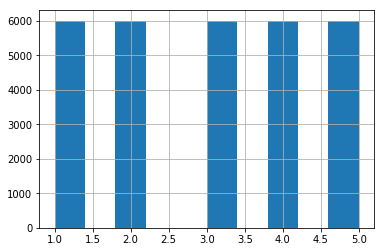

In [24]:
print(train['label'].value_counts()) # very balanced data

train['label'].hist()

In [25]:
#converting label to hot encoding
train = pd.get_dummies(train, columns = ['label'])
train.head(2)

,key,product_id,review_summary,review_text,review,label_1.0,label_2.0,label_3.0,label_4.0,label_5.0
0,0,2f3f32df46c949fd84a8a4a0c1b902c2,Five Stars,Good fun.,five star good fun,0,0,0,0,1
1,1,b6c7faacaada4de3a007d1bca3e7efe3,Close but no cigar,"This is a a great kit and has most of what you need. However the platic in my inside came warped, and the handle lock in so firmly you have to yank them to get them out.",close but no cigar this be great kit and have most of what you need however the platic in my inside come warped and the handle lock in so firmly you have to yank them to get them out,0,0,1,0,0


In [28]:
# I'm using GLoVe word vectors to get pretrained word embeddings
# max number of words from review to use
# max number of unique words ( total here we have around 21300) 
max_features = 21000
maxlen = 300

# File path
# embedding_file = './nn_assets/glove.twitter.27B.25d.txt'
embedding_file = base_path+'/nn_assets/glove.twitter.27B.200d.txt'
embed_size = 200  # use accroding to file used ( 25 for 25D)


# read in embeddings
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(embedding_file,encoding="utf8"))

In [29]:
X=train[['review','label_1.0', 'label_2.0', 'label_3.0', 'label_4.0', 'label_5.0']]
y=train['label_1.0']

#TODO: can we train with full data and only check using CrossValidation from model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) # only care about X 

X_train.shape,X_test.shape

((27000, 6), (3000, 6))

In [30]:
class_names = ['label_1.0', 'label_2.0', 'label_3.0', 'label_4.0', 'label_5.0']
y_train = X_train[class_names].values

In [31]:
train_samp=X_train
test_samp=X_test
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_samp['review'].values))
X_train = tokenizer.texts_to_sequences(train_samp['review'].values) # TODO : we can fit on all data
X_test = tokenizer.texts_to_sequences(test_samp['review'].values)
x_train = pad_sequences(X_train, maxlen = maxlen)
x_test = pad_sequences(X_test, maxlen = maxlen)

In [32]:
word_index = tokenizer.word_index

nb_words = min(max_features, len(word_index))
# create a zeros matrix of the correct dimensions 
embedding_matrix = np.zeros((nb_words, embed_size))
print("matrix-shape:",embedding_matrix.shape)
missed = []
for word, i in word_index.items():
    if i >= max_features: break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        missed.append(word)

matrix-shape: (21000, 200)


In [33]:
print("missed word from embeddings:",len(missed))
missed[:10]

missed word from embeddings: 3582


['picturemate',
 'manduka',
 'moleskines',
 'perforate',
 'esbit',
 'aerobie',
 'papermate',
 'labeler',
 'kjbrk',
 'jmfvy']

In [34]:
inp = Input(shape = (maxlen,))
x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = True)(inp)
x = SpatialDropout1D(0.5)(x)
x = Bidirectional(LSTM(40, return_sequences=True))(x)
x = Bidirectional(GRU(40, return_sequences=True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
outp = Dense(5, activation = 'sigmoid')(conc)

model = Model(inputs = inp, outputs = outp)
# patience is how many epochs to wait to see if val_loss will improve again.
earlystop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)
checkpoint = ModelCheckpoint(monitor = 'val_loss', save_best_only = True, filepath = 'yelp_lstm_gru_weights1.hdf5')
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

W0624 14:43:56.907030 10688 deprecation.py:323] From C:\Users\pateash\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 200)     4200000     input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 300, 200)     0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 300, 80)      77120       spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [35]:
# Load the TensorBoard notebook extension
%load_ext tensorboard


In [40]:
import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(x_train, y_train, batch_size = 512, epochs = 4, validation_split = .1,
          callbacks=[earlystop, checkpoint,tensorboard_callback])

Train on 24300 samples, validate on 2700 samples
Epoch 1/4
24300/24300 [==============================] - 746s 31ms/step - loss: 0.5171 - accuracy: 0.7951 - val_loss: 0.4861 - val_accuracy: 0.8000


W0624 15:02:12.913026 10688 deprecation_wrapper.py:119] From C:\Users\pateash\AppData\Roaming\Python\Python37\site-packages\keras\callbacks\tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.



Epoch 2/4
24300/24300 [==============================] - 767s 32ms/step - loss: 0.4488 - accuracy: 0.8078 - val_loss: 0.3908 - val_accuracy: 0.8233
Epoch 3/4
24300/24300 [==============================] - 886s 36ms/step - loss: 0.3649 - accuracy: 0.8392 - val_loss: 0.3256 - val_accuracy: 0.8544
Epoch 4/4
24300/24300 [==============================] - 714s 29ms/step - loss: 0.3206 - accuracy: 0.8588 - val_loss: 0.3070 - val_accuracy: 0.8614


In [ ]:
%tensorboard --logdir "./logs/"

In [46]:
model.save("nn_accuracy_epoch_40_200d_overnight.hdf5")

In [47]:
y_test = model.predict([x_test], batch_size=1024, verbose = 1)

3000/3000 [==============================] - 23s 8ms/step


In [48]:
test = tokenizer.texts_to_sequences(test['review'].values)
test_final = pad_sequences(test, maxlen = maxlen)

In [49]:
evaluation_score=model.evaluate(x_test, test_samp[class_names].values, verbose = 1, batch_size=1024)
evaluation_score

3000/3000 [==============================] - 20s 7ms/step


[0.3028712814648946, 0.8652002215385437]

In [50]:
v = metrics.classification_report(np.argmax(test_samp[class_names].values, axis = 1),np.argmax(y_test, axis = 1))
print(v)

              precision    recall  f1-score   support

           0       0.58      0.82      0.68       626
           1       0.46      0.40      0.43       595
           2       0.67      0.42      0.52       570
           3       0.60      0.65      0.62       606
           4       0.82      0.81      0.81       603

    accuracy                           0.62      3000
   macro avg       0.63      0.62      0.61      3000
weighted avg       0.63      0.62      0.62      3000



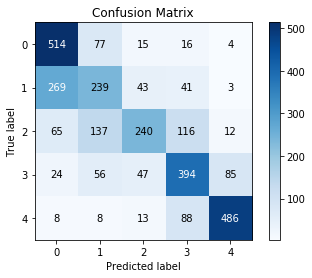

In [51]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(np.argmax(test_samp[class_names].values, axis = 1),np.argmax(y_test, axis = 1))

In [52]:
final_preds=model.predict([test_final],batch_size=1024,verbose=1)

final_preds[:10]

19999/19999 [==============================] - 127s 6ms/step


array([[0.0127584 , 0.02495238, 0.04654434, 0.87639153, 0.09769914],
       [0.00763568, 0.00951347, 0.02500698, 0.31323874, 0.75735974],
       [0.24102592, 0.2904685 , 0.1669265 , 0.08996072, 0.02144748],
       [0.01305145, 0.04017341, 0.10758182, 0.7079123 , 0.13598803],
       [0.00785509, 0.02415878, 0.23373955, 0.28907394, 0.38299093],
       [0.6269916 , 0.37245035, 0.1408996 , 0.02737004, 0.00328672],
       [0.04209501, 0.21780363, 0.6306529 , 0.18353829, 0.01005337],
       [0.00946236, 0.01200089, 0.05787283, 0.2899561 , 0.7053147 ],
       [0.27395585, 0.3306721 , 0.26357645, 0.02834907, 0.00836906],
       [0.03423372, 0.14602375, 0.46444482, 0.3406404 , 0.01867381]],
      dtype=float32)

In [53]:
import pickle

def saveClassifierNN(model,filename):
    #score rounded to 3 places
    filename=filename+"_"+"loss"+'_'+str(evaluation_score[0])+"_accuracy_"+str(evaluation_score[1])
    model.save("./models/"+filename)


# generating result
def generateOutputFile(classifier_name):
    score="loss"+'_'+str(evaluation_score[0])+"_accuracy_"+str(evaluation_score[1])
    shape="_"+str(max_features) # features used
    
    output=np.argmax(final_preds,axis=1)+1 # class output
    key=pd.read_csv("./data/test_data.csv",usecols=['key'])
    result=pd.DataFrame(output,columns=['prediction'])
    assert(key.shape[0]==19999)
    assert(len(final_preds==19999))
    result=pd.concat([key,result],axis=1)
    fileName="output/result_"+classifier_name+"_"+vectType+shape+score+".csv"
    result.to_csv(fileName,index = False)
    print("Generated: "+fileName)

In [ ]:

saveClassifierNN(model,'neural_network_multiclass_lemmatization_test')

generateOutputFile('neural_network_multiclass_lemmatization_test')